<a href="https://colab.research.google.com/github/suhasparashar/ML/blob/master/HW3%20(SVM%20using%20Majorizer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

y = iris.target
x = iris.data


In [0]:
import numpy as np

In [0]:
capA = np.append(np.append(np.identity(4),np.zeros((4,1)),axis=1),np.zeros((1,5)),axis=0)
x_0 = np.matrix(x[0:50])
x_0 = np.append(np.array(x_0),np.ones((len(x_0),1)),axis=1)


x_1 = np.matrix(x[50:100])
x_1 = np.append(np.array(x_1),np.ones((len(x_1),1)),axis=1)


x_2 = np.matrix(x[100:150])
x_2 = np.append(np.array(x_2),np.ones((len(x_2),1)),axis=1)



y1 = np.append(y[0:50],y[50:100], axis = 0);

y2 = np.append(y[50:100],y[100:150], axis = 0);
y3 = np.append(y[100:150],y[0:50], axis = 0);

In [0]:
y1[y1==0] = -1;
y1[y1==1] = 1;

y2[y2==1] = -1;
y2[y2==2] = 1;

y3[y3==2] = -1;
y3[y3==0] = 1;

In [0]:
x1 = np.matrix(np.append(x_0,x_1,axis = 0))
x2 = np.matrix(np.append(x_1,x_2,axis = 0))
x3 = np.matrix(np.append(x_2,x_0,axis = 0))


In [0]:
def findAcc(W, X , Y):
  pred = W*X.T
  count = 0;
  pred[pred >= 1] =  1
  pred[pred <= - 1] = -1
  pred = np.array(pred)[0]
  for i in range(len(Y)):
    if pred[i] == Y[i]:
      count = count + 1;
      
  return 100 - count

In [0]:
def leastSquares(X, Y):
  return (Y.T*X) * np.linalg.inv(X.T*X);
  

In [0]:
def majoriser(W, X, Y, e):
  U = np.ones(len(Y)) - np.multiply(Y,W*X.T)
  U = np.array(U)
  U[U < e] = e
  return U[0]

In [0]:
def findK(X, U, C):
  s = X[0].T*X[0]/U[0];
  for i in range(1,len(X)):
    s = s + (X[i].T*X[i]/U[i]);
  return C*s;
  

In [0]:
def findV(Y, X, U, C):
  s = ((1 + U[0])*Y.T*X)/(2*U[0]);
  for i in range(1,len(X)):
    s = s + ((1 + U[i])*Y.T*X)/(2*U[i]);
  return C*s;
  

In [0]:
def findW(CapA, K, V):
  return np.reshape(np.linalg.inv(CapA + K) * V.T, (1,5));


In [0]:
def MajVal(W, CapA, C, Y, X, U):
  s = (( 1 - Y[0] * np.array(W*X[0].T)[0][0] + U[0])**2)/(4*U[0]);
  for i in range(1,len(X)):
    s = s + ((1 - Y[i]*np.array(W*X[i].T)[0][0] + U[i])**2)/(4*U[i]);
    
  return (0.5*W*CapA*W.T) + (C*( s) )
  


In [0]:
u1 = np.ones(150)
u2 = np.ones(150)
u3 = np.ones(150)

# Classification Criterion
-1 belongs to class 1 

+1 belongs to class 2

In [0]:
C1=[0.01,.1,10,100]
l1 = [[],[],[],[]]
a1 = [[],[],[],[]]
ct = 0;
for C in C1:
  for i in range(10):
    k1 = findK(x1, u1, C)
    v1 = findV(y1, x1, u1, C)
    w1 = findW(capA, k1, v1)
    
    l1[ct].append(np.array(MajVal(w1, capA, C, y1, x1, u1)*(-1))[0][0]);
    u1 = majoriser(w1, x1, y1, 1e-8)
    a1[ct].append(findAcc(w1,x1 , y1))
    if len(l1[ct])>2 and l1[ct][-1] == l1[ct][-2]:
      break
  ct=ct+1
print("MissClassification Error")
a1

MissClassification Error


[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

# Classification Criterion
-1 belongs to class 2 

+1 belongs to class 3

In [0]:
C1=[0.01,.1,10,100]
l2 = [[],[],[],[]]
a2 = [[],[],[],[]]

ct = 0;
for C in C1:
  for i in range(10):
    
    k2 = findK(x2, u2, C)
    v2 = findV(y2, x2, u2, C)
    w2 = findW(capA, k2, v2)
    
    l2[ct].append(np.array(MajVal(w2, capA, C, y2, x2, u2)*(-1))[0][0])
    u2 = majoriser(w2, x2, y2, 1e-8)

    a2[ct].append(findAcc(w2,x2 , y2))
    if len(l2[ct])>2 and l2[ct][-1] == l2[ct][-2]:
      break
  ct=ct+1
print("MissClassification Error")
a2


MissClassification Error


[[8, 4, 3, 3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]]

# Classification Criterion
-1 belongs to class 3 

+1 belongs to class 1

In [0]:
C1=[0.01,.1,10,100]

l3 = [[],[],[],[]]
a3 = [[],[],[],[]]


ct = 0;
for C in C1:
  for i in range(10):

    k3 = findK(x3, u3, C)
    v3 = findV(y3, x3, u3, C)
    w3 = findW(capA, k3, v3)
    


    
    l3[ct].append((np.array(MajVal(w3, capA, C, y3, x3, u3)*(-1))[0][0]))
    u3 = majoriser(w3, x3, y3, 1e-8)
    a3[ct].append(findAcc(w3,x3 , y3))
    if len(l3[ct])>2 and l3[ct][-1] == l3[ct][-2]:
      break
  ct=ct+1
print("MissClassification Error")
a3

MissClassification Error


[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Class 1 vs Class 2 : C = 0.01')

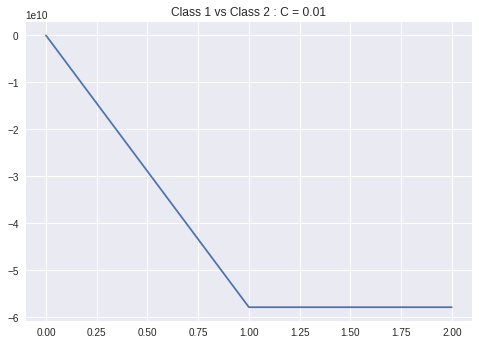

In [0]:
plt.plot(np.arange(len(l1[0])),l1[0])
plt.title("Class 1 vs Class 2 : C = 0.01")

Text(0.5, 1.0, 'Class 2 vs Class 3 : C = 0.01')

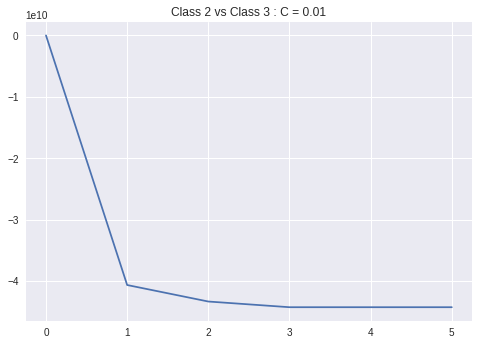

In [0]:
plt.plot(np.arange(len(l2[0])),l2[0])
plt.title("Class 2 vs Class 3 : C = 0.01")

Text(0.5, 1.0, 'Class 3 vs Class 1 : C = 0.01')

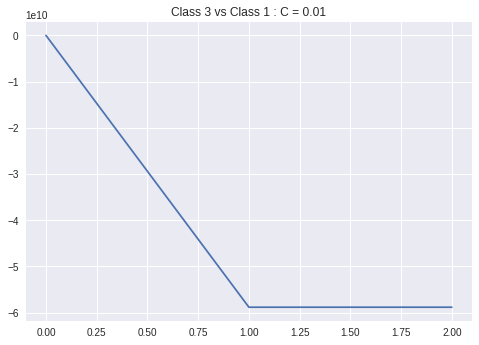

In [0]:
plt.plot(np.arange(len(l3[0])),l3[0])
plt.title("Class 3 vs Class 1 : C = 0.01")

# **Convergent Criteria : **  
If the majorizer value between two iterations not change above a threshold, we stop the iteration


In [0]:
from sklearn.svm import SVC

In [0]:
clf = SVC(kernel = 'linear',C=0.01)
clf.fit(x[0:100],y1)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
wskl1 = clf.coef_[0]
bskl1 = clf.intercept_[0]
print("w for case 1")
print(w1)
print("w from sklearn")
print(wskl1)
print("b from sklearn")
print(bskl1)

w for case 1
[[ -2.84896813 -16.81975158  20.31308955  28.78501702 -13.0296578 ]]
w from sklearn
[ 0.12682126 -0.17203387  0.54581657  0.21521261]
b from sklearn
-1.9100768495115985


In [0]:
clf = SVC(kernel = 'linear',C=0.01)
clf.fit(x[50:150],y2)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
wskl2 = clf.coef_[0]
bskl2 = clf.intercept_[0]
print("w for case 2")
print(w2)
print("w from sklearn")
print(wskl2)
print("b from sklearn")
print(bskl2)

w for case 2
[[-19.46533587 -29.82153753  37.75400145  65.86096282 -87.95009616]]
w from sklearn
[0.19656521 0.05988142 0.47852569 0.29474308]
b from sklearn
-4.29011214213263


In [0]:
clf = SVC(kernel = 'linear',C=0.01)
clf.fit(np.append(x[100:150],x[0:50],axis=0),y2)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
wskl3 = clf.coef_[0]
bskl3 = clf.intercept_[0]
print("w for case 3")
print(w3)
print("w from sklearn")
print(wskl3)
print("b from sklearn")
print(bskl3)

w for case 3
[[  7.95625453   6.037053   -18.34122057 -18.46155966  19.84797813]]
w from sklearn
[-0.10558651  0.09315191 -0.4217961  -0.19039805]
b from sklearn
1.9030521456556233
